In [25]:
!pipenv install statsmodels seaborn

Installing statsmodels...
Adding statsmodels to Pipfile's [packages]...
✔ Installation Succeeded 
Installing seaborn...
Adding seaborn to Pipfile's [packages]...
✔ Installation Succeeded 
Pipfile.lock (f49ec8) out of date, updating to (31e3a7)...
Locking [dev-packages] dependencies...
Locking [packages] dependencies...
Building requirements...
Resolving dependencies...
✔ Success! 
Ignoring error when setting locale: unsupported locale setting
Updated Pipfile.lock (31e3a7)!
Installing dependencies from Pipfile.lock (31e3a7)...
  🐍   ▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉ 0/0 — 00:00:00


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from statsmodels import api as sm

In [28]:
df = pd.read_csv('format_chikaho_data.csv')
df.head()

,アレイ,合計,大通り→札幌,日時,札幌→大通り,補正,format_date
0,J1,642,323,2020-06-01 05:45:00+09:00,319,NaN,2020-06-01
1,J2,657,353,2020-06-01 05:45:00+09:00,304,NaN,2020-06-01
2,J3,1094,529,2020-06-01 05:45:00+09:00,565,NaN,2020-06-01
3,J4,1021,496,2020-06-01 05:45:00+09:00,525,NaN,2020-06-01
4,J5,316,160,2020-06-01 05:45:00+09:00,156,NaN,2020-06-01


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316840 entries, 0 to 316839
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   アレイ          316840 non-null  object 
 1   合計           316840 non-null  int64  
 2   大通り→札幌       316840 non-null  int64  
 3   日時           316840 non-null  object 
 4   札幌→大通り       316840 non-null  int64  
 5   補正           48836 non-null   float64
 6   format_date  316840 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 16.9+ MB


In [30]:
df['format_date'] = pd.to_datetime(df['format_date'], format='%Y/%m/%d')

In [31]:
daily_data = df.groupby('format_date')['合計'].sum().reset_index().set_index(['format_date'])
daily_data.head()

,合計
format_date,
2018-10-01,355203
2018-10-02,416885
2018-10-03,414290
2018-10-04,411429
2018-10-05,406890


In [82]:
result = sm.tsa.seasonal_decompose(daily_data['合計'], model='multiplicative', freq=360)

<ipython-input-82-f8b1f3610d6a>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = sm.tsa.seasonal_decompose(daily_data['合計'], model='multiplicative', freq=360)


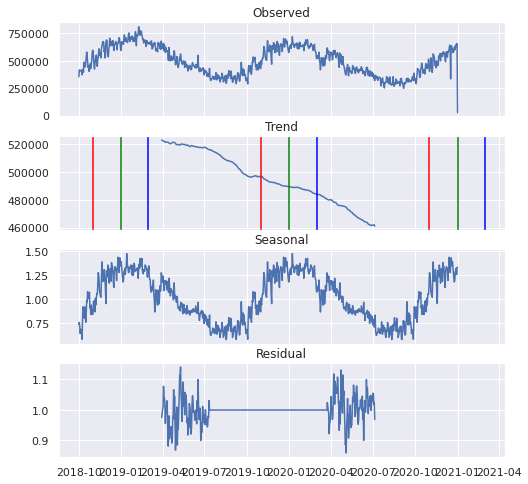

In [83]:
import datetime
# 描画する領域を用意する
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 8), sharex=True)

# 原系列
axes[0].set_title('Observed')
axes[0].plot(result.observed)

# 傾向変動
axes[1].set_title('Trend')
axes[1].plot(result.trend)

axes[1].axvline(x=datetime.datetime(2018,11,1), c='red')
axes[1].axvline(x=datetime.datetime(2019,11,1), c='red')
axes[1].axvline(x=datetime.datetime(2020,11,1), c='red')
axes[1].axvline(x=datetime.datetime(2019,1,1), c='green')
axes[1].axvline(x=datetime.datetime(2020,1,1), c='green')
axes[1].axvline(x=datetime.datetime(2021,1,1), c='green')
axes[1].axvline(x=datetime.datetime(2019,3,1), c='blue')
axes[1].axvline(x=datetime.datetime(2020,3,1), c='blue')
axes[1].axvline(x=datetime.datetime(2021,3,1), c='blue')

# 季節変動
axes[2].set_title('Seasonal')
axes[2].plot(result.seasonal)

# 残差 (不規則変動 = 誤差変動 + 特異的変動)
axes[3].set_title('Residual')
axes[3].plot(result.resid)

# グラフを表示する
plt.show()